## 필요 라이브러리 import

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
mpl.rcParams["font.family"] = "Malgun Gothic"

### category-encoders 
test셋 제외 category-encoders 사용 고려해 볼 것

### load Datasets

In [2]:
train_data = pd.read_csv("./data/train (2).csv")
test_data = pd.read_csv("./data/test.csv")
sample_data = pd.read_csv("./data/sample_submission (2).csv")

## 데이터 탐색

In [3]:
train_data.shape

(20000, 23)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [9]:
train_data.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [10]:
test_data.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown


In [11]:
sample_data.head()

,ID,Income
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0


In [12]:
train_data.describe().T.style.background_gradient()  # 몇 값들의 경우 0인 값도 보이고, 최대값의 경우 99999로 찍히는 모습도 확인할 수 있음

,count,mean,std,min,25%,50%,75%,max
Age,20000.000000,35.632500,17.994414,0.000000,23.000000,34.000000,47.000000,90.000000
Working_Week (Yearly),20000.000000,34.943050,22.254592,0.000000,7.000000,52.000000,52.000000,52.000000
Gains,20000.000000,383.129500,4144.247487,0.000000,0.000000,0.000000,0.000000,99999.000000
Losses,20000.000000,40.202150,279.182677,0.000000,0.000000,0.000000,0.000000,4356.000000
Dividends,20000.000000,123.451450,1206.949429,0.000000,0.000000,0.000000,0.000000,45000.000000
Income,20000.000000,554.565250,701.553155,0.000000,0.000000,500.000000,875.000000,9999.000000


### 데이터 전처리
- test데이터셋과 병합하여 함께 전처리하고 이후 다시 분할한다.

In [13]:
combined_train_test = pd.concat([train_data.drop(labels="Income", axis=1), test_data]).reset_index(drop=True)
target = train_data["Income"]

- income의 경우 target값임에도 이후에 이상치를 제거해야 할 듯 함
    + 단, IQR값을 이용해 제거하는 것이 아닌, 임의의 값(5800)을 지정하여 제거한다.

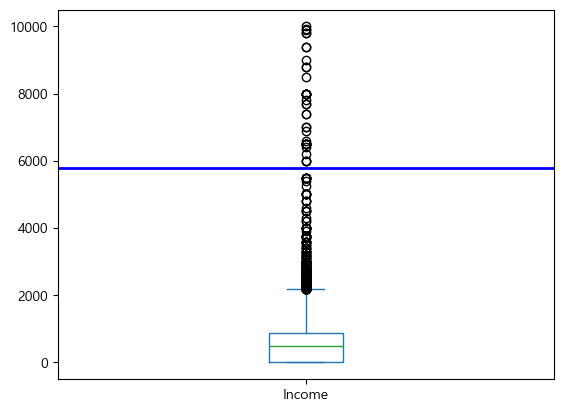

In [14]:
target.plot(kind="box")
plt.axhline(y=5800, color='b', linewidth=2)
plt.show()

In [15]:
combined_train_test

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Householder,Native,US,US,US,Single,0,0,0,Under Median
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Householder,Native,US,US,US,Single,0,0,0,Under Median
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Householder,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,TEST_9995,31,M,Bachelors degree,Children or Armed Forces,52,Other professional services,Technicians & Support,White,All other,...,Householder,Native,US,US,US,Single,0,0,0,Under Median
29996,TEST_9996,27,M,College,Children or Armed Forces,52,Retail,Handlers/Cleaners,White,All other,...,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median
29997,TEST_9997,18,M,High graduate,Children or Armed Forces,7,Retail,Services,Black,All other,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
29998,TEST_9998,9,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Under Median


In [16]:
# 범주형, 수치형 분할
numeric_df = combined_train_test.select_dtypes(exclude="object")
object_df = combined_train_test.select_dtypes(exclude="int64")

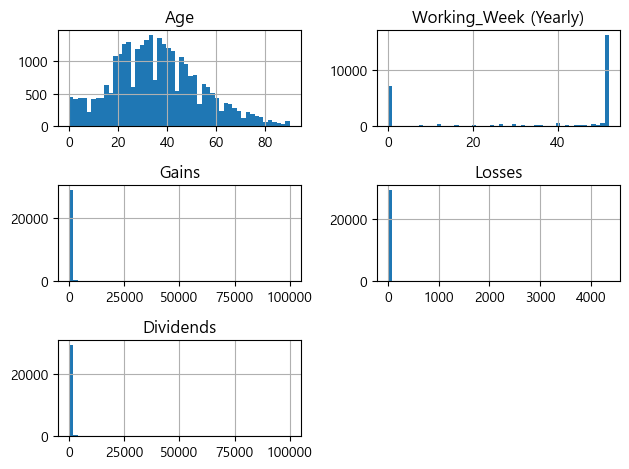

In [17]:
# 연속형 변수로만 이뤄진 데이터프레임 시각화
numeric_df.hist(bins=50)
plt.tight_layout()
plt.show()

Age의 경우 어느정도 고른 분포를 보이는 것 같으나, Gains, Losses, Dividends 컬럼의 경우 분포도 고르지 못하고 스케일 또한 크다.

이후 학습 데이터로 구성할 때는 세 개의 컬럼을 제외하고 구성한다.

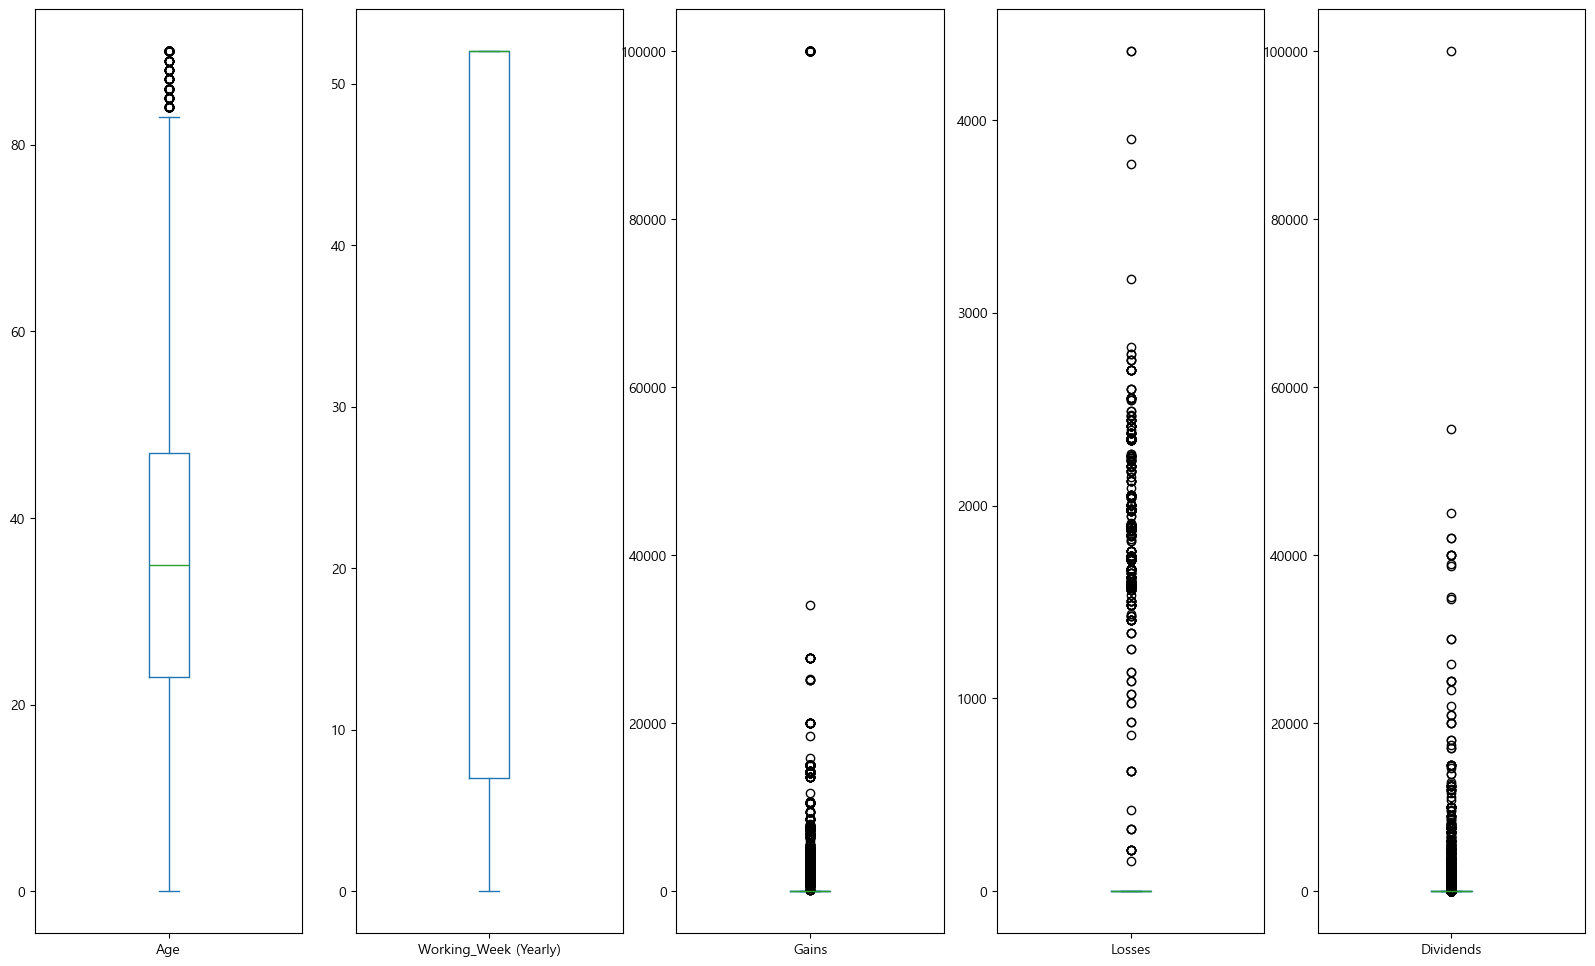

In [18]:
# Boxplot 시각화
numeric_df.plot(kind="box", figsize=(20, 12), subplots=True)
plt.show()

In [19]:
numeric_df.isnull().values.any()  # 연속형 변수값들엔 결측치가 없다.

False

## 범주형 자료형 전처리

In [20]:
object_df.isnull().values.any()  # 결측값 발견

True

In [21]:
object_df.info()  # Household_Status에 결측값 하나 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      30000 non-null  object
 1   Gender                  30000 non-null  object
 2   Education_Status        30000 non-null  object
 3   Employment_Status       30000 non-null  object
 4   Industry_Status         30000 non-null  object
 5   Occupation_Status       30000 non-null  object
 6   Race                    30000 non-null  object
 7   Hispanic_Origin         30000 non-null  object
 8   Martial_Status          30000 non-null  object
 9   Household_Status        29999 non-null  object
 10  Household_Summary       30000 non-null  object
 11  Citizenship             30000 non-null  object
 12  Birth_Country           30000 non-null  object
 13  Birth_Country (Father)  30000 non-null  object
 14  Birth_Country (Mother)  30000 non-null  object
 15  Ta

대회 규칙에 의거하면 통계값을 활용하여 결측값을 처리하라고 안내하기에, 최빈값을 사용한다.

In [22]:
mode_value = object_df.tail(10000)["Household_Status"].mode()[0]  # 뒤에서 부터 10000개의 경우 테스트 데이터이기에 테스트 데이터의 최빈값으로
object_df = object_df.fillna(mode_value)  # 결측값을 채운다.

In [23]:
object_df.info()  # 결측값 처리 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      30000 non-null  object
 1   Gender                  30000 non-null  object
 2   Education_Status        30000 non-null  object
 3   Employment_Status       30000 non-null  object
 4   Industry_Status         30000 non-null  object
 5   Occupation_Status       30000 non-null  object
 6   Race                    30000 non-null  object
 7   Hispanic_Origin         30000 non-null  object
 8   Martial_Status          30000 non-null  object
 9   Household_Status        30000 non-null  object
 10  Household_Summary       30000 non-null  object
 11  Citizenship             30000 non-null  object
 12  Birth_Country           30000 non-null  object
 13  Birth_Country (Father)  30000 non-null  object
 14  Birth_Country (Mother)  30000 non-null  object
 15  Ta

## About Object DF

|컬럼명|설명|
|---|---|
|ID|고유 식별자 $\rarr$ 필요 없을 것으로 예상|
|Gender|성별|
|Education_status|학력|
|Employment_status|근무 형태|
|Industry_status|직업군|
|Occupation_status|직무|
|Race|인종|
|Hispanic_Origin|히스패닉 출신 여부|
|Martial_Status|결혼여부|
|Household_Status|가족 구성|
|Household_Summary|가족 구성 요약본|
|Citizenship|시민권|
|Birth_Country|출생국|
|Birth_Country (Father)|부 출생국|
|Birth_Country (Mother)|모 출생국|
|Tax_Status|세금 지출 여부|
|Income_Status|소득 상태|

In [24]:
object_df.drop(labels="ID", axis=1, inplace=True)  # ID의 경우 학습에 큰 영향을 미치지 않기에 제거

### 값 범례 지정
각 컬럼들의 값을 살펴 범례를 새롭게 지정한다.

1. Martial_Status
> Divoeced, Widowed = Single,  
  others = Married

2. Education_Status
> Kindergarten, Elementary, Middle, High, College, Over The College

3. Birth Country, Birth Country(Father), Birth Country(Mother)
> US, nonUS

In [25]:
def map_single_married(value):
    if value not in ["Single", "Married"]:
        if value in ["Divorced", "Widowed"]:
            return "Single"
        else:
            return "Married"
    else:
        return value

In [26]:
def map_education(value):
    if value not in "Kindergarten,Elementary,Middle,High,College or Over The College".split(","):
        if "Elementary" in value:
            return "Elementary"
        elif "Middle" in value:
            return "Middle"
        elif "High" in value:
            return "High"
        elif "College" in value or "degree" in value:
            return "College or Over The College"
        else:
            return "Kindergarten"
    else:
        return value

<Axes: xlabel='Education_Status', ylabel='count'>

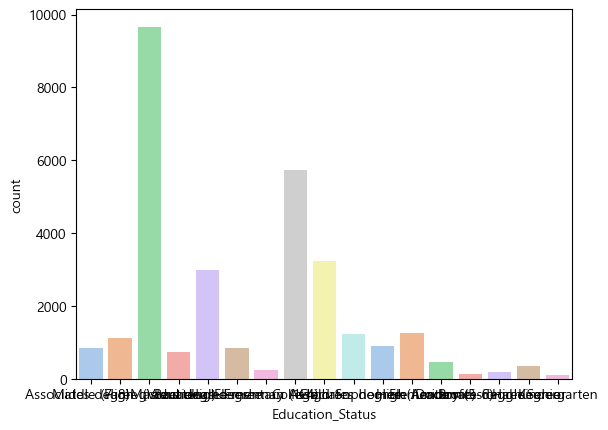

In [27]:
sns.countplot(x = "Education_Status", data = object_df, palette="pastel")

In [28]:
object_df["Education_Status"] = object_df["Education_Status"].apply(map_education)

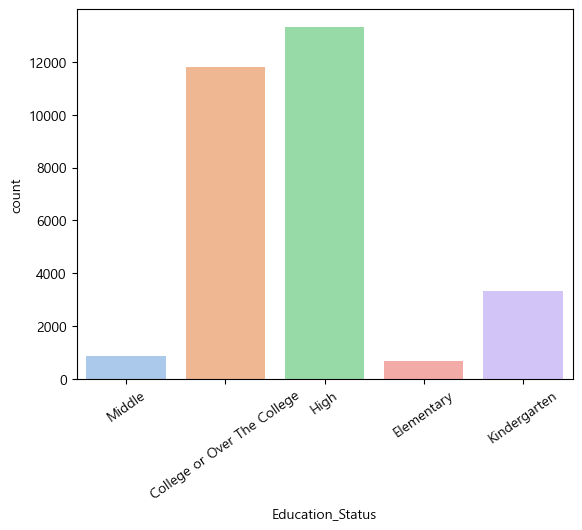

In [29]:
sns.countplot(x = "Education_Status", data = object_df, palette="pastel")
plt.xticks(rotation=35)
plt.show()

In [30]:
object_df["Martial_Status"] = object_df["Martial_Status"].apply(map_single_married)

In [31]:
cols = ["Birth_Country", "Birth_Country (Father)", "Birth_Country (Mother)"]
for col in cols:
    object_df[col] = object_df[col].apply(lambda x : x if x == "US" else "non-US")

In [32]:
object_df_copy = object_df.copy()

In [33]:
# 범주형 데이터 원핫인코딩
encoded_df = pd.get_dummies(object_df_copy, drop_first=True)

In [34]:
print(f"OneHotEncoding 전 shape : {object_df_copy.shape}")
print(f"OneHotEncoding 후 shape : {encoded_df.shape}")


OneHotEncoding 전 shape : (30000, 16)
OneHotEncoding 후 shape : (30000, 114)


In [35]:
for col in encoded_df.columns:
    encoded_df[col] = encoded_df[col].apply(lambda x : 1 if x else 0)

In [36]:
encoded_df

,Gender_M,Education_Status_Elementary,Education_Status_High,Education_Status_Kindergarten,Education_Status_Middle,Employment_Status_Choice Part-Time,Employment_Status_Full-Time,Employment_Status_Not Working,Employment_Status_Part-Time (Usually Full-Time),Employment_Status_Part-Time (Usually Part-Time),...,Birth_Country_non-US,Birth_Country (Father)_non-US,Birth_Country (Mother)_non-US,Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Under Median,Income_Status_Unknown
0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
29996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
29997,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
29998,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### 데이터셋 분할하기
아까 병합했던 데이터셋을 다시 분할한다.

In [37]:
numeric_df = numeric_df[["Age", "Working_Week (Yearly)"]]

In [38]:
test_df = pd.concat([encoded_df.tail(10000).reset_index(drop=True), numeric_df.tail(10000).reset_index(drop=True)], axis=1)
test_df.to_csv("./new_data/lstrip_test.csv", encoding="utf8", sep=",", index=False)

In [39]:
test_df

,Gender_M,Education_Status_Elementary,Education_Status_High,Education_Status_Kindergarten,Education_Status_Middle,Employment_Status_Choice Part-Time,Employment_Status_Full-Time,Employment_Status_Not Working,Employment_Status_Part-Time (Usually Full-Time),Employment_Status_Part-Time (Usually Part-Time),...,Birth_Country (Mother)_non-US,Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Under Median,Income_Status_Unknown,Age,Working_Week (Yearly)
0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,79,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,47,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,18,52
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,39,30
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,31,52
9996,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,27,52
9997,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,18,7
9998,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,9,0


In [40]:
train_df = pd.concat([numeric_df.head(20000), encoded_df.head(20000)], axis=1)

In [41]:
train_df = pd.concat([target, train_df], axis=1)

In [42]:
train_df

,Income,Age,Working_Week (Yearly),Gender_M,Education_Status_Elementary,Education_Status_High,Education_Status_Kindergarten,Education_Status_Middle,Employment_Status_Choice Part-Time,Employment_Status_Full-Time,...,Birth_Country_non-US,Birth_Country (Father)_non-US,Birth_Country (Mother)_non-US,Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Under Median,Income_Status_Unknown
0,425,63,4,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0,37,52,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,860,58,52,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,850,44,52,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,570,37,52,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1300,33,52,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
19996,850,20,12,0,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,1,0
19997,999,22,52,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
19998,0,76,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0


In [43]:
train_df = train_df.loc[train_df["Income"] < 5800]  # 타겟값 제거

In [44]:
train_df

,Income,Age,Working_Week (Yearly),Gender_M,Education_Status_Elementary,Education_Status_High,Education_Status_Kindergarten,Education_Status_Middle,Employment_Status_Choice Part-Time,Employment_Status_Full-Time,...,Birth_Country_non-US,Birth_Country (Father)_non-US,Birth_Country (Mother)_non-US,Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Under Median,Income_Status_Unknown
0,425,63,4,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0,37,52,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,860,58,52,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,850,44,52,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,570,37,52,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1300,33,52,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
19996,850,20,12,0,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,1,0
19997,999,22,52,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
19998,0,76,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0


In [45]:
train_df.to_csv("./new_data/lstrip_tarin.csv", encoding="utf8", sep=",", index=False)